In [21]:
import pandas as pd

In [24]:
mkt = pd.read_csv('MKT.csv')
mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [26]:
mkt.dtypes

,0
youtube,float64
facebook,float64
newspaper,float64
sales,float64


In [27]:
mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [28]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
!pip install chart_studio
import chart_studio.plotly as py
import cufflinks as cf

import plotly.express as ptl
import plotly.graph_objects as go

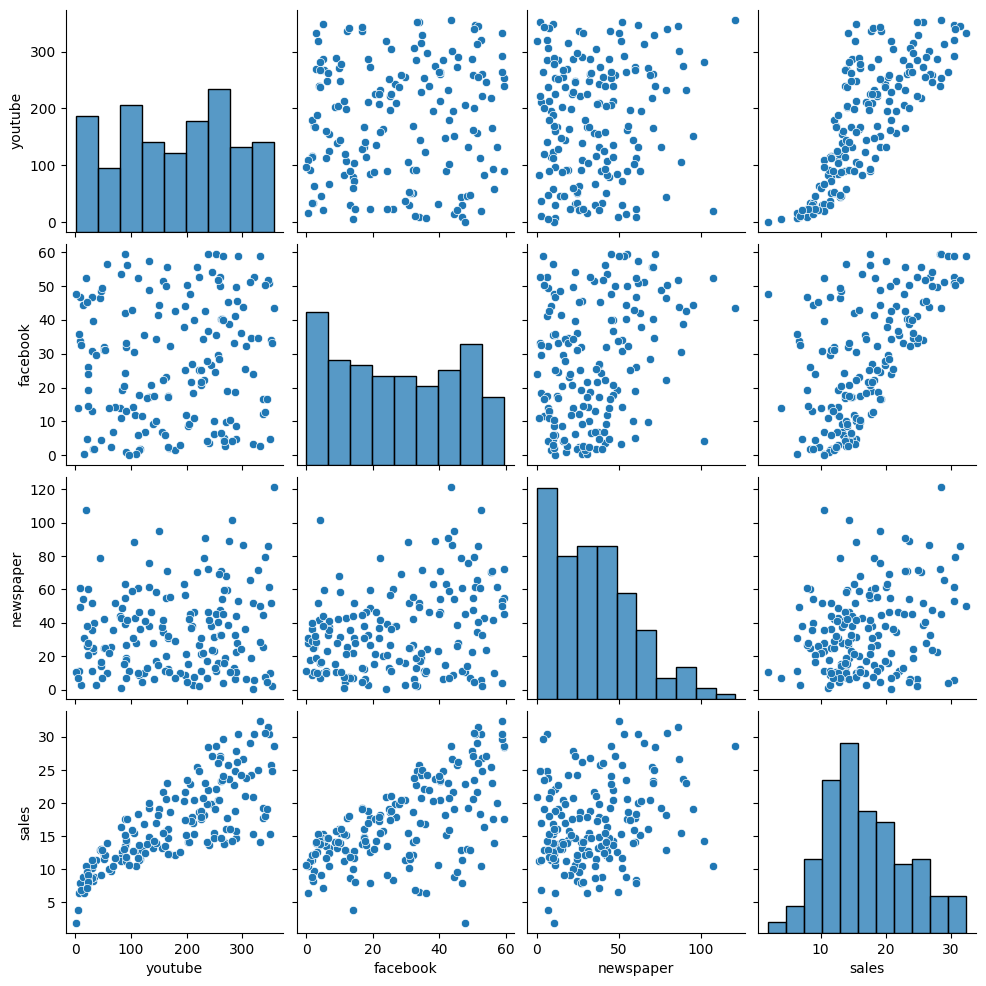

In [30]:
sns.pairplot(mkt)

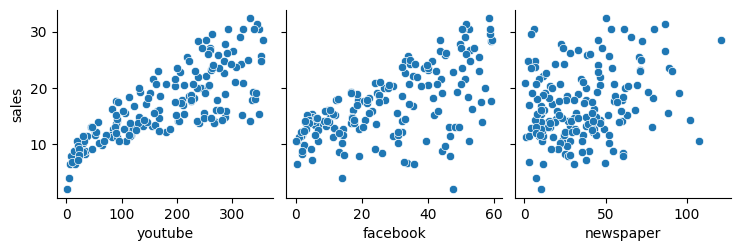

In [40]:
sns.pairplot(mkt, x_vars=['youtube','facebook','newspaper'], y_vars='sales')


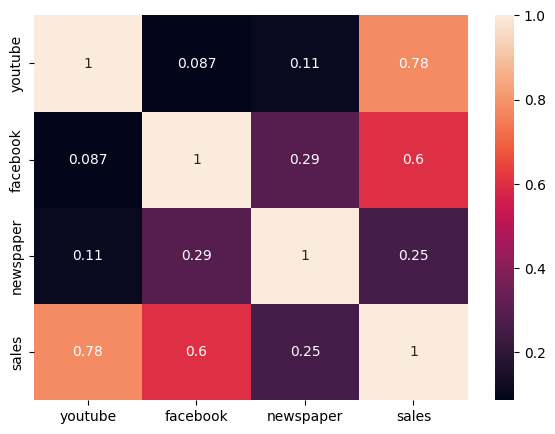

In [37]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7, 5))
sns.heatmap(mkt.corr(), annot=True)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar as variáveis independentes (X) e dependentes (y)
X = mkt[['youtube', 'facebook', 'newspaper']]
y = mkt['sales']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Coeficientes do modelo
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

MSE: 5.576790234026718
R2 Score: 0.8728630857012158
Coeficientes: [ 4.54361665e+00  3.47882307e+00 -1.24622817e-03]
Intercepto: 16.82558823529412


In [43]:
from sklearn.metrics import mean_squared_error, r2_score

# Fazer previsões
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 5.576790234026718
RMSE: 2.361522863329237
R² Score: 0.8728630857012158


In [47]:
# Orçamento
investimentos = np.array([[500, 800, 0]]);

# Normalização dos Dados
investimentos_scaled = scaler.transform(investimentos);

# Previsão de Vendas
vendas_previstas = model.predict(investimentos_scaled);

# Exibição dos Resultados
print(f"Previsão do número de vendas: {vendas_previstas[0]:.2f}")


Previsão do número de vendas: 181.38


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



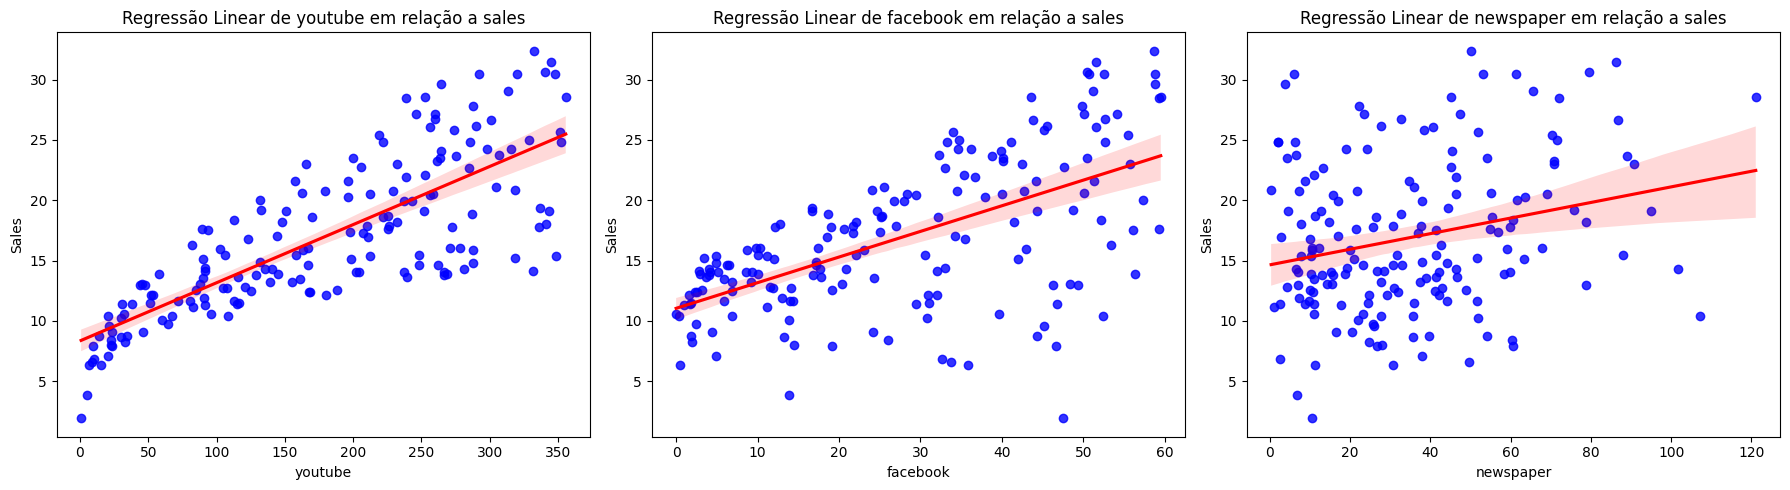

In [48]:
# Criar uma figura com 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Definir os nomes das colunas
columns = ['youtube', 'facebook', 'newspaper']

# Plotar cada variável independente
for i, col in enumerate(columns):
    sns.regplot(x=col, y='sales', data=mkt, ax=axes[i], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    axes[i].set_title(f'Regressão Linear de {col} em relação a sales')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Sales')

plt.tight_layout()
plt.show()

In [49]:
def prever_vendas(youtube, facebook, newspaper):
    # Normalizar os dados de entrada
    dados_novos = pd.DataFrame([[youtube, facebook, newspaper]], columns=['youtube', 'facebook', 'newspaper'])
    dados_novos_scaled = scaler.transform(dados_novos)

    # Fazer a previsão
    previsao = model.predict(dados_novos_scaled)

    return previsao[0]

novo_youtube = 1000
novo_facebook = 500
novo_newspaper = 500

venda_prevista = prever_vendas(novo_youtube, novo_facebook, novo_newspaper)
print(f'Previsão de Vendas: {venda_prevista}')

Previsão de Vendas: 145.10546118646477


In [50]:
novo_youtube = 1000
novo_facebook = 1000
novo_newspaper = 0

venda_prevista = prever_vendas(novo_youtube, novo_facebook, novo_newspaper)
print(f'Previsão de Vendas: {venda_prevista}')

Previsão de Vendas: 242.3708658512238
